In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from scipy.stats import spearmanr
from sklearn.metrics import r2_score


In [58]:
file='final_edamam_pred.csv'
mint_pred = pd.read_csv(file)
mint_pred['error_RRR'] = mint_pred['RRR'].values-mint_pred['RRR_pred'].values
mint_pred['upperCI_RRR_diff'] = mint_pred['RRR_uci'].values-mint_pred['RRR_pred'].values
mint_pred['lowerCI_RRR_diff'] = mint_pred['RRR_lci'].values-mint_pred['RRR_pred'].values
mint_pred['norm_error_RRR'] = [err/u if err> 0 else -err/l for u,l,err in mint_pred[['upperCI_RRR_diff', 'lowerCI_RRR_diff','error_RRR']].values]
best_scale_rrr = 0
for scale in np.arange(20,50,0.2):
    
    mint_pred['rescaled_upperCI_RRR_diff'] = mint_pred['upperCI_RRR_diff'].values*scale
    mint_pred['rescaled_lowerCI_RRR_diff'] = [diff*scale if diff*scale+pred >=0 else -pred for diff,pred in mint_pred[['lowerCI_RRR_diff','RRR_pred']].values]
    mint_pred['rescaled_norm_error_RRR'] = [err/u if err> 0 else -err/l for u,l,err in mint_pred[['rescaled_upperCI_RRR_diff', 'rescaled_lowerCI_RRR_diff','error_RRR']].values]
    
    out_of_bounds = len([err for err in mint_pred['rescaled_norm_error_RRR'].values if np.abs(err)>1])/len(mint_pred)
    #len(mint_pred['rescaled_norm_error_RRR'].values[np.abs(mint_pred['rescaled_norm_error_RRR'].values)>1])/len(mint_pred)
    if out_of_bounds < 0.05:
        best_scale_rrr= scale
        print(best_scale_rrr)
        break
print(out_of_bounds)

mint_pred['error_RRR_macro'] = mint_pred['RRR_macro'].values-mint_pred['RRR_macro_pred'].values
mint_pred['upperCI_RRR_macro_diff'] = mint_pred['RRRm_uci'].values-mint_pred['RRR_macro_pred'].values
mint_pred['lowerCI_RRR_macro_diff'] = mint_pred['RRRm_lci'].values-mint_pred['RRR_macro_pred'].values
mint_pred['norm_error_RRR_macro'] = [err/u if err> 0 else -err/l for u,l,err in mint_pred[['upperCI_RRR_macro_diff', 'lowerCI_RRR_macro_diff','error_RRR_macro']].values]
best_scale_macro = 0
for scale in np.arange(20,50,0.2):
    
    mint_pred['rescaled_upperCI_RRR_macro_diff'] = mint_pred['upperCI_RRR_macro_diff'].values*scale
    mint_pred['rescaled_lowerCI_RRR_macro_diff'] = [diff*scale if diff*scale+pred >=0 else -pred for diff,pred in mint_pred[['lowerCI_RRR_macro_diff','RRR_macro_pred']].values]
    
    mint_pred['rescaled_norm_error_RRR_macro'] = [err/u if err> 0 else -err/l for u,l,err in mint_pred[['rescaled_upperCI_RRR_macro_diff', 'rescaled_lowerCI_RRR_macro_diff','error_RRR_macro']].values]
    
    out_of_bounds = len([err for err in mint_pred['rescaled_norm_error_RRR_macro'].values if np.abs(err)>1])/len(mint_pred)
    if out_of_bounds < 0.05:
        best_scale_macro= scale
        print(best_scale_macro)
        break
print(out_of_bounds)


                                                                                                                                       

37.59999999999994
0.049735839783757216
35.99999999999994
0.04988327804398575


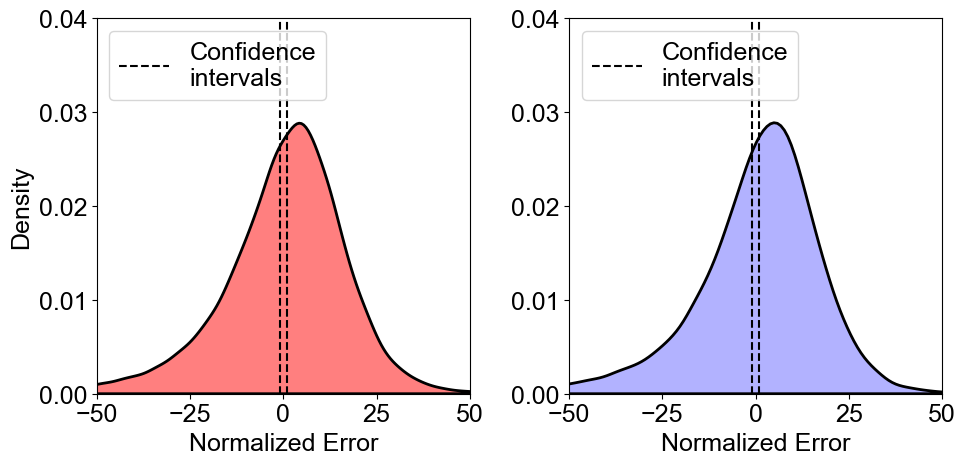

In [11]:
matplotlib.rcParams['font.family']='Arial'
matplotlib.rcParams['font.size']=18
fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.kdeplot(-mint_pred['norm_error_RRR_macro'].values,fill=True,color='r',alpha=0.5,edgecolor='k',linewidth=2,gridsize=1000,ax=axes[0])
axes[0].plot([1,1],[0,1],'k--',label='Confidence\nintervals')
axes[0].plot([-1,-1],[0,1],'k--',label=None)
axes[0].set_ylim([0,0.04])
axes[0].set_xlim([-50,50])
axes[0].legend(loc='upper left')
axes[0].set_xlabel('Normalized Error')

sns.kdeplot(-mint_pred['norm_error_RRR'].values,fill=True,color='b',alpha=0.3,edgecolor='k',linewidth=2,gridsize=1000,ax=axes[1])
axes[1].plot([1,1],[0,1],'k--',label='Confidence\nintervals')
axes[1].plot([-1,-1],[0,1],'k--',label=None)
axes[1].set_ylim([0,0.04])
axes[1].set_xlim([-50,50])
axes[1].set_ylabel('')
axes[1].legend(loc='upper left')
axes[1].set_xlabel('Normalized Error')
plt.tight_layout()
plt.savefig('unnorm_dist.pdf',transparent=True)
plt.show()

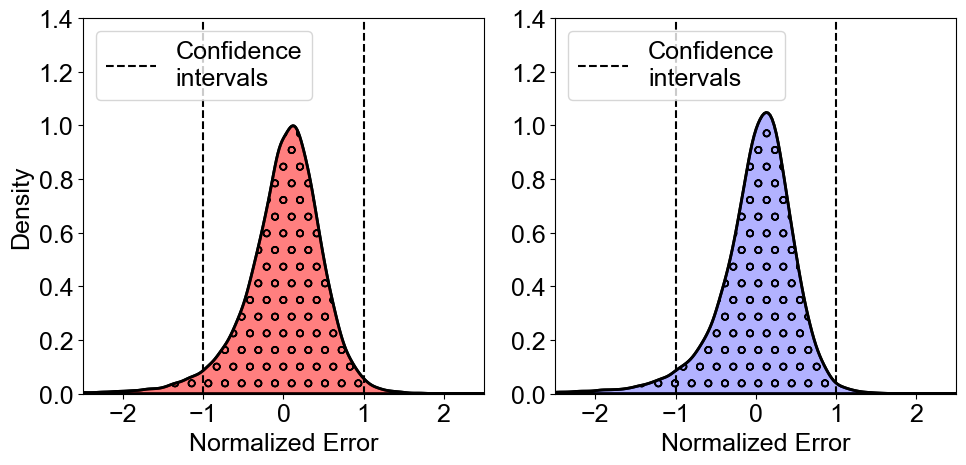

In [59]:
matplotlib.rcParams['font.family']='Arial'
matplotlib.rcParams['font.size']=18
fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.kdeplot(-mint_pred['rescaled_norm_error_RRR_macro'].values,fill=True,color='w',hatch='o',alpha=1,edgecolor='k',linewidth=2,gridsize=1000,ax=axes[0])
sns.kdeplot(-mint_pred['rescaled_norm_error_RRR_macro'].values,fill=True,color='r',hatch='o',alpha=0.5,edgecolor='k',linewidth=2,gridsize=1000,ax=axes[0])
axes[0].plot([1,1],[0,2],'k--',label='Confidence\nintervals')
axes[0].plot([-1,-1],[0,2],'k--',label=None)
axes[0].set_ylim([0,1.4])
axes[0].set_xlim([-2.5,2.5])
axes[0].legend(loc='upper left')
axes[0].set_xlabel('Normalized Error')
sns.kdeplot(-mint_pred['rescaled_norm_error_RRR'].values,fill=True,color='w',hatch='o',alpha=1,edgecolor='k',linewidth=2,gridsize=1000,ax=axes[1])
sns.kdeplot(-mint_pred['rescaled_norm_error_RRR'].values,fill=True,color='b',hatch='o',alpha=0.3,edgecolor='k',linewidth=2,gridsize=1000,ax=axes[1])
axes[1].plot([1,1],[0,2],'k--',label='Confidence\nintervals')
axes[1].plot([-1,-1],[0,2],'k--',label=None)
axes[1].set_ylim([0,1.4])
axes[1].set_xlim([-2.5,2.5])
axes[1].legend(loc='upper left')
axes[1].set_ylabel('')
axes[1].set_xlabel('Normalized Error')
plt.tight_layout()
plt.savefig('norm_dist.pdf',transparent=True)
plt.show()

In [60]:

mean_ci = (mint_pred['upperCI_RRR_macro_diff'].values+np.abs(mint_pred['lowerCI_RRR_macro_diff'].values))/2
print(spearmanr(np.abs(mint_pred['error_RRR_macro'].values),mean_ci))
mean_ci = (mint_pred['upperCI_RRR_diff'].values+np.abs(mint_pred['lowerCI_RRR_diff'].values))/2
print(spearmanr(np.abs(mint_pred['error_RRR'].values),mean_ci))

SignificanceResult(statistic=0.48372464370376894, pvalue=0.0)
SignificanceResult(statistic=0.5718896750734128, pvalue=0.0)


0.10644257703081232


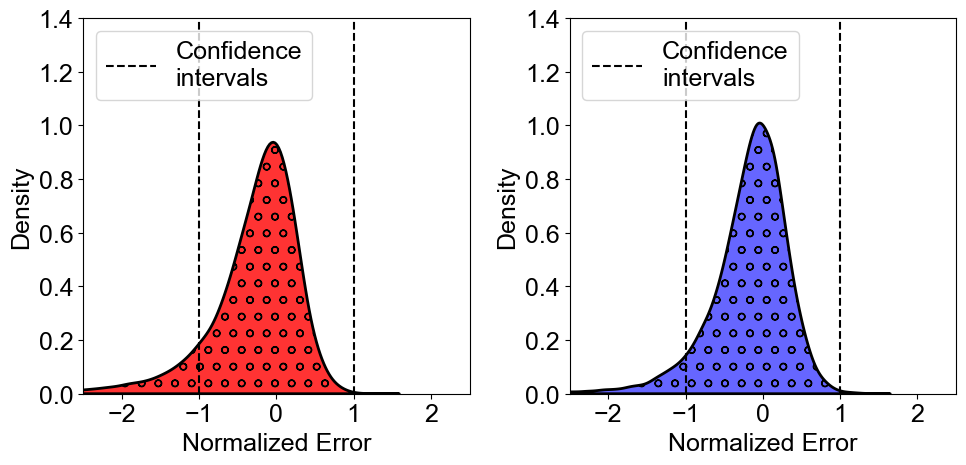

0.06580056837700259
0.030831736046263988


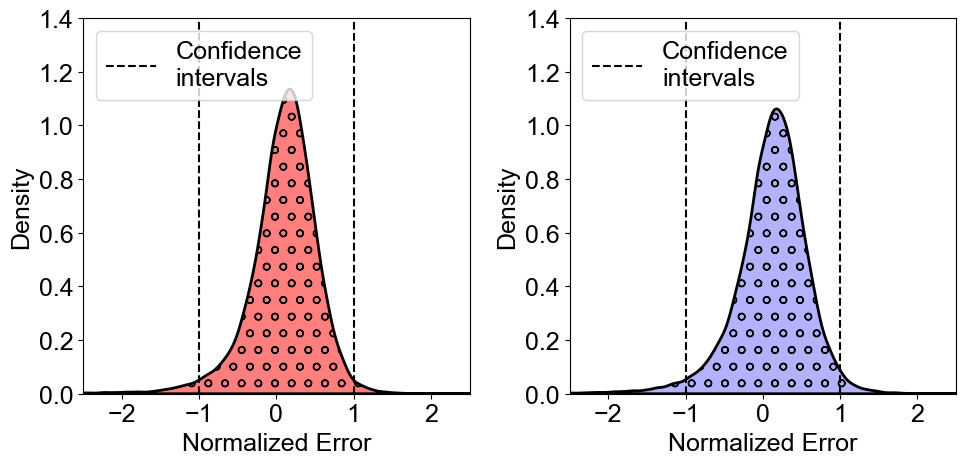

0.03955923757823736


In [61]:


fig,axes=plt.subplots(1,2,figsize=(10,5))

sns.kdeplot(-mint_pred['rescaled_norm_error_RRR'].values[mint_pred['RRR'].values>1],fill=True,color='r',hatch='o',alpha=0.8,edgecolor='k',linewidth=2,gridsize=1000,ax=axes[0])
axes[0].plot([1,1],[0,2],'k--',label='Confidence\nintervals')
axes[0].plot([-1,-1],[0,2],'k--',label=None)
axes[0].set_ylim([0,1.4])
axes[0].set_xlim([-2.5,2.5])
axes[0].legend(loc='upper left')
axes[0].set_xlabel('Normalized Error')

print(len(np.abs(mint_pred['rescaled_norm_error_RRR'].values[mint_pred['RRR'].values>1])[np.abs(mint_pred['rescaled_norm_error_RRR'].values[mint_pred['RRR'].values>1])>1])/len(np.abs(mint_pred['rescaled_norm_error_RRR'].values[mint_pred['RRR'].values>1])))

sns.kdeplot(-mint_pred['rescaled_norm_error_RRR_macro'].values[mint_pred['RRR_macro'].values>1],fill=True,color='b',hatch='o',alpha=0.6,edgecolor='k',linewidth=2,gridsize=1000,ax=axes[1])
axes[1].plot([1,1],[0,2],'k--',label='Confidence\nintervals')
axes[1].plot([-1,-1],[0,2],'k--',label=None)
axes[1].set_ylim([0,1.4])
axes[1].set_xlim([-2.5,2.5])
axes[1].legend(loc='upper left')
axes[1].set_xlabel('Normalized Error')
plt.tight_layout()
plt.savefig('norm_dist_high.pdf',transparent=True)
plt.show()
print(len(np.abs(mint_pred['rescaled_norm_error_RRR_macro'].values[mint_pred['RRR_macro'].values>1])[np.abs(mint_pred['rescaled_norm_error_RRR_macro'].values[mint_pred['RRR_macro'].values>1])>1])/len(np.abs(mint_pred['rescaled_norm_error_RRR_macro'].values[mint_pred['RRR_macro'].values>1])))


fig,axes=plt.subplots(1,2,figsize=(10,5))

sns.kdeplot(-mint_pred['rescaled_norm_error_RRR'].values[mint_pred['RRR'].values<=1],fill=True,color='r',hatch='o',alpha=0.5,edgecolor='k',linewidth=2,gridsize=1000,ax=axes[0])
axes[0].plot([1,1],[0,2],'k--',label='Confidence\nintervals')
axes[0].plot([-1,-1],[0,2],'k--',label=None)
axes[0].set_ylim([0,1.4])
axes[0].set_xlim([-2.5,2.5])
axes[0].legend(loc='upper left')
axes[0].set_xlabel('Normalized Error')
print(len(np.abs(mint_pred['rescaled_norm_error_RRR'].values[mint_pred['RRR'].values<=1])[np.abs(mint_pred['rescaled_norm_error_RRR'].values[mint_pred['RRR'].values<=1])>1])/len(np.abs(mint_pred['rescaled_norm_error_RRR'].values[mint_pred['RRR'].values<=1])))

sns.kdeplot(-mint_pred['rescaled_norm_error_RRR_macro'].values[mint_pred['RRR_macro'].values<=1],fill=True,color='b',hatch='o',alpha=0.3,edgecolor='k',linewidth=2,gridsize=1000,ax=axes[1])
axes[1].plot([1,1],[0,2],'k--',label='Confidence\nintervals')
axes[1].plot([-1,-1],[0,2],'k--',label=None)
axes[1].set_ylim([0,1.4])
axes[1].set_xlim([-2.5,2.5])
axes[1].legend(loc='upper left')
axes[1].set_xlabel('Normalized Error')
plt.tight_layout()
plt.savefig('norm_dist_low.pdf',transparent=True)
plt.show()

print(len(np.abs(mint_pred['rescaled_norm_error_RRR_macro'].values[mint_pred['RRR_macro'].values<=1])[np.abs(mint_pred['rescaled_norm_error_RRR_macro'].values[mint_pred['RRR_macro'].values<=1])>1])/len(np.abs(mint_pred['rescaled_norm_error_RRR_macro'].values[mint_pred['RRR_macro'].values<=1])))


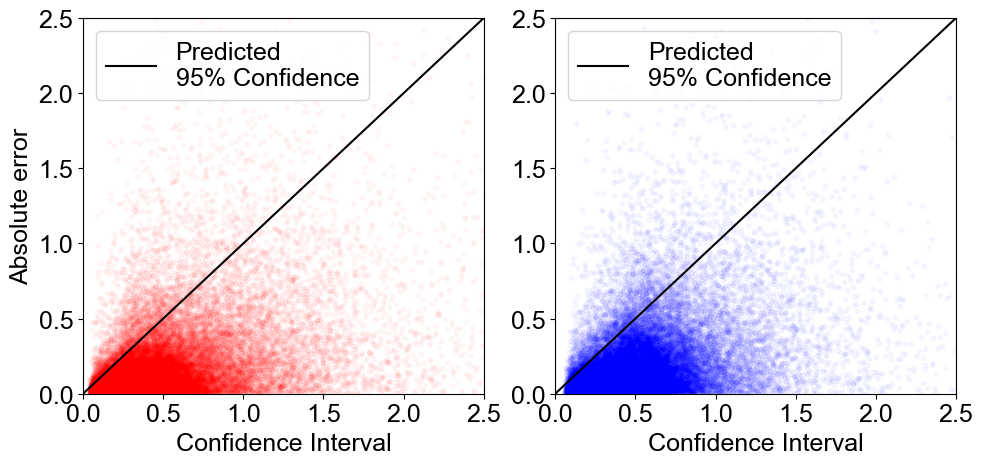

0.5863251013638039
0.607310480402998


In [63]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
axes[0].plot([u if err>0 else l for u,l,err in best_scale_rrr*mint_pred[['upperCI_RRR_diff', 'lowerCI_RRR_diff','error_RRR']].values],np.abs(mint_pred['error_RRR'].values),'r.',alpha=0.03)
axes[0].set_ylabel('Absolute error')
axes[0].set_xlabel('Confidence Interval')
axes[0].plot([0,10],[0,10],'k-',label='Predicted\n95% Confidence')
axes[0].set_ylim([0,2.5])
axes[0].set_xlim([0,2.5])
axes[0].legend(loc='upper left')
axes[1].plot([u if err>0 else l for u,l,err in best_scale_macro*mint_pred[['upperCI_RRR_macro_diff', 'lowerCI_RRR_macro_diff','error_RRR_macro']].values],np.abs(mint_pred['error_RRR_macro'].values),'b.',alpha=0.03)
#axes[1].set_ylabel('Absolute error')
axes[1].set_xlabel('Confidence Interval')
axes[1].plot([0,10],[0,10],'k-',label='Predicted\n95% Confidence')
axes[1].set_ylim([0,2.5])
axes[1].set_xlim([0,2.5])
axes[1].legend(loc='upper left')
plt.tight_layout()
plt.savefig('CIvsError.png',dpi=120,transparent=True)
plt.show()
above_ci = 0
for ci,err in zip([u if err> 0 else l for u,l,err in best_scale_macro*mint_pred[['upperCI_RRR_macro_diff', 'lowerCI_RRR_macro_diff','error_RRR_macro']].values],np.abs(mint_pred['error_RRR_macro'].values)):
    if err>ci:
        above_ci+=1
print(above_ci/len(mint_pred))


above_ci = 0
for ci,err in zip([u if err>0 else l for u,l,err in best_scale_rrr*mint_pred[['upperCI_RRR_diff', 'lowerCI_RRR_diff','error_RRR']].values],np.abs(mint_pred['error_RRR'].values)):
    if err>ci:
        above_ci+=1
print(above_ci/len(mint_pred))

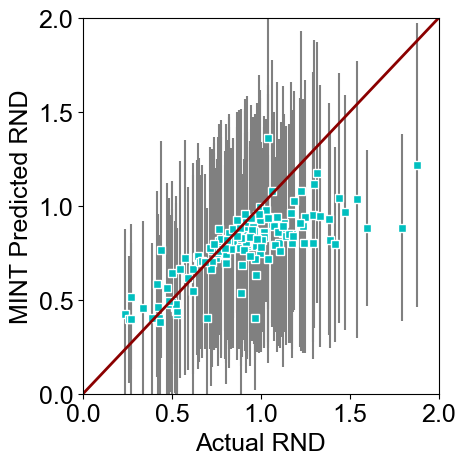

0.40145492923288106
SignificanceResult(statistic=0.7771571406077782, pvalue=1.4735571310049554e-30)


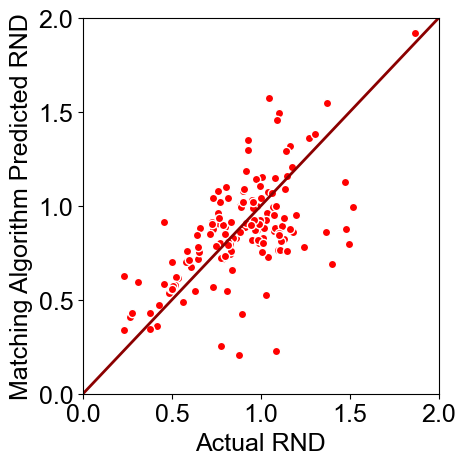

-0.011834112040334022
SignificanceResult(statistic=0.5463628325697292, pvalue=1.4065317683114061e-12)


In [65]:
RNQ= pd.read_csv('spoon_MINT_pred.csv')
restaurants = RNQ['restaurantChain'].drop_duplicates().values
restaurants_RNQ = RNQ.groupby('restaurantChain')
RNQ['rescaled_lower_ci_diff'] = (RNQ['Predicted RRR_m1'].values - RNQ['lower_ci'].values)*best_scale_macro
RNQ['rescaled_upper_ci_diff'] = (RNQ['upper_ci'].values - RNQ['Predicted RRR_m1'].values)*best_scale_macro

pred_gt = {'gt':[],'pred':[],'upper':[],'lower':[]}
for r in restaurants:
    restaurant_RNQ = restaurants_RNQ.get_group(r).drop_duplicates()
    rnq_mean_gt = restaurant_RNQ['True RRR_m1'].values.mean()
    rnq_mean_pred = restaurant_RNQ['Predicted RRR_m1'].values.mean()  
    rnq_pred_ci_lower = np.sqrt(np.sum(restaurant_RNQ['rescaled_lower_ci_diff'].values**2)/len(restaurant_RNQ))
    rnq_pred_ci_upper = np.sqrt(np.sum(restaurant_RNQ['rescaled_upper_ci_diff'].values**2)/len(restaurant_RNQ))
    pred_gt['gt'].append(rnq_mean_gt)
    pred_gt['pred'].append(rnq_mean_pred)
    pred_gt['upper'].append(rnq_pred_ci_upper)
    pred_gt['lower'].append(rnq_pred_ci_lower)

pred_gt = pd.DataFrame(pred_gt)
fig,axes=plt.subplots(1,1,figsize=(5,5))
plt.errorbar(pred_gt['gt'].values,pred_gt['pred'].values,yerr=[pred_gt['lower'].values,pred_gt['upper'].values],color='gray',linestyle='')
plt.plot(pred_gt['gt'].values,pred_gt['pred'].values,'cs',markeredgecolor='w')
plt.plot([0,3],[0,3],'darkred',linestyle='-',linewidth=2)
plt.xlim([0,2])
plt.ylim([0,2])
plt.ylabel('MINT Predicted RND')
plt.xlabel('Actual RND')
plt.tight_layout()
plt.savefig('RND_mint.pdf')
plt.show()
print(r2_score(pred_gt['gt'].values,pred_gt['pred'].values))
print(spearmanr(pred_gt['gt'].values,pred_gt['pred'].values))


RNQ= pd.read_csv('usda_spoon.csv')
RNQ['True RRR_m1'] = RNQ['RRR_m1']
restaurants = RNQ['restaurantChain'].drop_duplicates().values
restaurants_RNQ = RNQ.groupby('restaurantChain')
RNQ['rescaled_lower_ci_diff'] = 0
RNQ['rescaled_upper_ci_diff'] = 0

pred_gt = {'gt':[],'pred':[],'upper':[],'lower':[]}
for r in restaurants:
    restaurant_RNQ = restaurants_RNQ.get_group(r).drop_duplicates()
    rnq_mean_gt = restaurant_RNQ['True RRR_m1'].values.mean()
    rnq_mean_pred = restaurant_RNQ['Predicted RRR_m1'].values.mean()  
    rnq_pred_ci_lower = np.sqrt(np.sum(restaurant_RNQ['rescaled_lower_ci_diff'].values**2)/len(restaurant_RNQ))
    rnq_pred_ci_upper = np.sqrt(np.sum(restaurant_RNQ['rescaled_upper_ci_diff'].values**2)/len(restaurant_RNQ))
    pred_gt['gt'].append(rnq_mean_gt)
    pred_gt['pred'].append(rnq_mean_pred)
    pred_gt['upper'].append(rnq_pred_ci_upper)
    pred_gt['lower'].append(rnq_pred_ci_lower)

pred_gt = pd.DataFrame(pred_gt)
fig,axes=plt.subplots(1,1,figsize=(5,5))
plt.errorbar(pred_gt['gt'].values,pred_gt['pred'].values,yerr=[pred_gt['lower'].values,pred_gt['upper'].values],color='gray',linestyle='')
plt.plot(pred_gt['gt'].values,pred_gt['pred'].values,'ro',markeredgecolor='w')
plt.plot([0,3],[0,3],'darkred',linestyle='-',linewidth=2)
plt.xlim([0,2])
plt.ylim([0,2])
plt.ylabel('Matching Algorithm Predicted RND')
plt.xlabel('Actual RND')
plt.tight_layout()
plt.savefig('RND.pdf')
plt.show()
print(r2_score(pred_gt['gt'].values,pred_gt['pred'].values))
print(spearmanr(pred_gt['gt'].values,pred_gt['pred'].values))

In [74]:

mint_pred['rescaled_upperCI_RRR'] = mint_pred['rescaled_upperCI_RRR_diff'].values + mint_pred['RRR_pred'].values
mint_pred['rescaled_lowerCI_RRR'] = mint_pred['rescaled_lowerCI_RRR_diff'].values + mint_pred['RRR_pred'].values
mint_pred[['Name','RRR','RRR_pred','rescaled_upperCI_RRR_diff','rescaled_lowerCI_RRR_diff','rescaled_lowerCI_RRR','rescaled_upperCI_RRR']].sort_values(by='rescaled_upperCI_RRR_diff')

mint_pred['rescaled_upperCI_RRR_macro'] = mint_pred['rescaled_upperCI_RRR_macro_diff'].values + mint_pred['RRR_macro_pred'].values
mint_pred['rescaled_lowerCI_RRR_macro'] = mint_pred['rescaled_lowerCI_RRR_macro_diff'].values + mint_pred['RRR_macro_pred'].values
mint_pred.loc[mint_pred['RRR_macro_pred']>0,['Name','RRR_macro','RRR_macro_pred','rescaled_upperCI_RRR_macro_diff','rescaled_lowerCI_RRR_macro','rescaled_upperCI_RRR_macro']].sort_values(by='rescaled_upperCI_RRR_macro_diff',ascending=True)






,Name,RRR_macro,RRR_macro_pred,rescaled_upperCI_RRR_macro_diff,rescaled_lowerCI_RRR_macro,rescaled_upperCI_RRR_macro
16788,Brownie Ice Cream Cake,0.201784,0.227946,0.049648,0.178298,0.277594
33995,Lemon Streusel Cake,0.229394,0.239291,0.049728,0.189563,0.289019
47016,Kahlua Cake,0.213600,0.237041,0.053817,0.183223,0.290858
69920,Sour Cream Crumb Cake,0.193962,0.232592,0.054956,0.177635,0.287547
56487,Butter Cake,0.172599,0.194320,0.056247,0.138073,0.250567
...,...,...,...,...,...,...
75746,Peanut Chutney Powder,1.714674,4.275565,4.334413,0.000000,8.609978
70046,Madras Curry Powder,7.311399,2.843340,4.510930,0.000000,7.354270
80777,Rasam Powder,7.602363,3.920783,4.904528,0.000000,8.825311
58306,Sambar Powder,5.408053,5.753093,5.471571,0.281540,11.224664


In [80]:
len(mint_pred.loc[mint_pred['rescaled_lowerCI_RRR_macro'].values==0.0,])/len(mint_pred)

0.09960683130605726

In [81]:
len(mint_pred.loc[mint_pred['rescaled_lowerCI_RRR'].values==0.0,])/len(mint_pred)

0.10606954171274112